In [3]:
import pandas as pd 

In [4]:
data=pd.read_csv('placement.csv')

In [5]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
data.drop(columns=['sl_no'], inplace=True)

In [7]:
# step 1 check null values 

In [8]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
# replace null vaues 

In [10]:
data['salary'].fillna(0, inplace=True)
data.isnull().sum()

C:\Users\anand\AppData\Local\Temp\ipykernel_3568\72118736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(0, inplace=True)


gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
##Replace the NaN values with correct value. And justify why you have chosen the same.

#when analyze the dataset in status column whereever not pplaced status is appear , on Next column  NAN value is there.
#the main reason os the salary' NAN  since the student is  not placed .
# if it was feature numerical column we can replace null values with mean and median .

### How many of them are not placed?

In [12]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

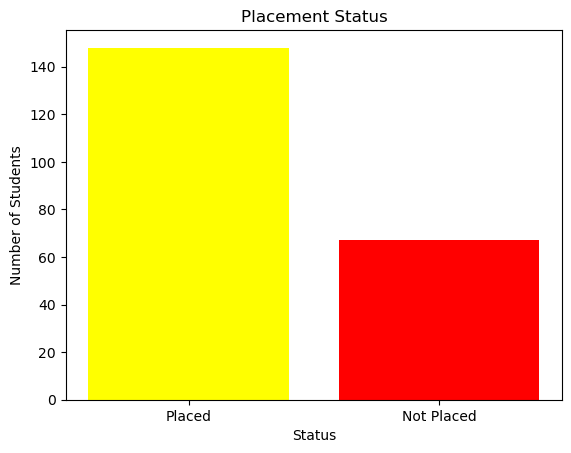

In [14]:
import matplotlib.pyplot as plt
status_counts = data['status'].value_counts()

plt.bar(status_counts.index, status_counts.values,color=["yellow", "red"] )
plt.title("Placement Status")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.show()


### Find the reason for non placement from the dataset?

In [17]:
from univariate import univariate

quan, qual=univariate.quanqual(data)
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [18]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

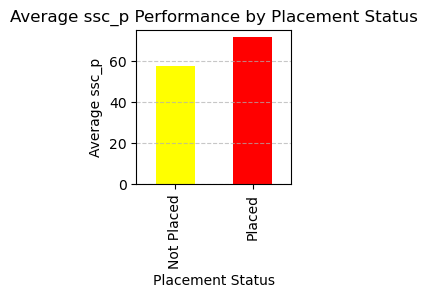

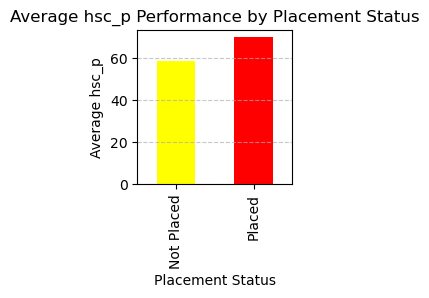

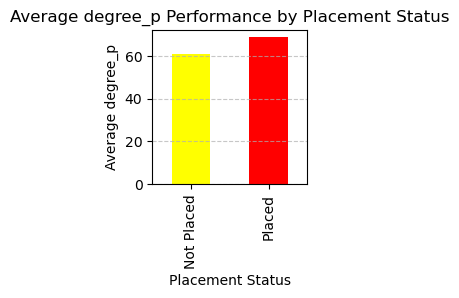

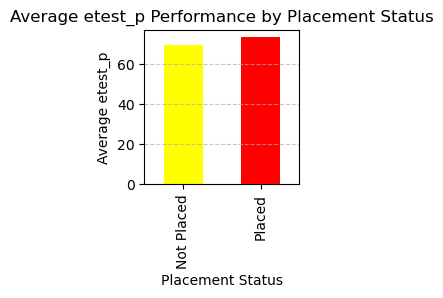

In [19]:
for column in quan:
    df = pd.DataFrame(data)
    if column == 'mba_p':
        break

# Plot: Average MBA performance vs placement status
    avg_mba = df.groupby("status")[column].mean()
    
    plt.figure(figsize=(2,2))
    avg_mba.plot(kind="bar", color=["yellow", "red"])
    plt.title(f"Average {column} Performance by Placement Status")
    plt.ylabel(f"Average {column}")
    plt.xlabel("Placement Status")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [20]:
#data.loc[data["status"].str.strip().str.lower() == "placed"]

### What kind of relation between salary and mba_p

In [21]:
### to check relation we can go with "Correlation"

In [22]:
data['mba_p'].corr(data['salary'])

np.float64(0.13982273892615557)

In [23]:
import seaborn as sns

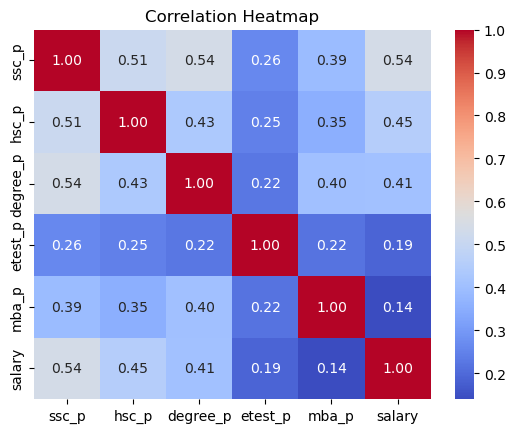

In [24]:
data1= data.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(data1, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [25]:
data.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


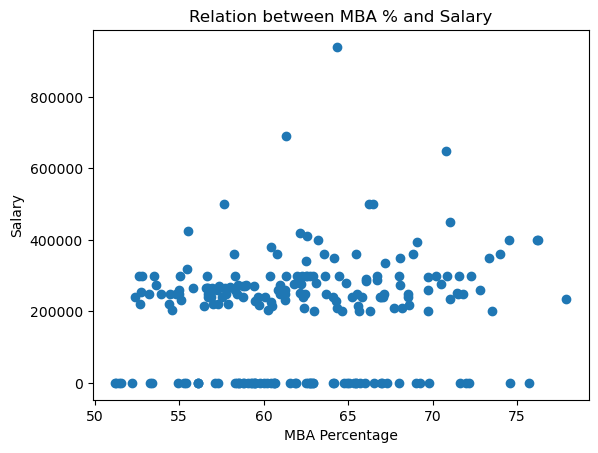

In [26]:
import matplotlib.pyplot as plt

plt.scatter(data['mba_p'], data['salary'])
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.title('Relation between MBA % and Salary')
plt.show()


In [27]:
data['mba_p'].corr(data['salary'])

np.float64(0.13982273892615557)

In [28]:
#Value close to +1 → strong positive relation
#Value close to –1 → strong negative relation
#Value near 0 → weak or no relation

#### final Takeawy 

the relation value is 0.14 between salary and mba_p . there is no much relation since low far fronm 0

### which specialization is getting minimum salary

In [29]:
data['salary'].min()

0.0

In [30]:
data[data['salary'] > 0]['salary'].idxmin()

np.int64(1)

In [31]:
a = data.iloc[[1]]
a


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [32]:
data['salary'].min()

0.0

In [33]:
## Mkt&Fin is getting low salary 

### which specialization is getting maximum salary

In [34]:
data[data['salary'] > 0]['salary'].idxmax()

np.int64(119)

In [35]:
b = data.iloc[[119]]
b

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


In [36]:
data['salary'].max()

940000.0

In [37]:
### Mkt&Fin also getting high salary 

### How many of them getting above 500000 salary?

In [38]:
data[data['salary'] > 50000]['salary'].idxmax()

np.int64(119)

In [39]:
## only 1 person getting above 50000RS 

### Test the Analysis of Variance between etest_p and mba_p at signifance
 #### level 5%.(Make decision using Hypothesis Testing)

🔸 When 2 groups → use t-test (simpler)
🔸 When 3+ groups → use One-Way ANOVA
🔸 But using ANOVA with 2 groups is not wrong — it gives the same result as t-test (since F = t²)

In [ ]:
from scipy import stats

f_stat, p_value = stats.f_oneway(data['etest_p'], data['mba_p'])
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → Significant difference between etest_p and mba_p.")
else:
    print("Fail to reject H₀ → No significant difference between etest_p and mba_p.")

In [ ]:
### using test Independent (Two-Sample) T-Test

In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(data['etest_p'], data['mba_p'], equal_var=False)  # Welch's t-test
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → Significant difference between etest_p and mba_p.")
else:
    print("Fail to reject H₀ → No significant difference between etest_p and mba_p.")

### Convert the normal distribution to standard normal distribution for salary column

#### normal distribution , mean and std required to find normal distribution

In [ ]:
mu = data['salary'].mean()
sigma = data['salary'].std()

print("Mean (μ):", mu)
print("Standard Deviation (σ):", sigma)

In [ ]:
sns.histplot(data['salary'], kde=True)
plt.title("Normal Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

#### Here busimness insight mean salary would be greater than the median salary.

### Standard Normal Distribution

In [ ]:
mu = data['salary'].mean()          # mean
sigma = data['salary'].std()        # standard deviation

data['z'] = (data['salary'] - mu) / sigma  # z=x-mu/sigma

In [ ]:
data['z'] 

In [ ]:
sns.histplot(data['z'], kde=True)
plt.title("Standard Normal Distribution of Salary")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# like 3 Person getting high salary (Might be extreme values )

#if  Z >3 95% out lier 

### Test the similarity between the degree_t(Sci&Tech)with respect to (etest_p and mba_p) at significance level of 5%.(Make decision using Hypothesis Testing) same Grop(ci&Tec) and different condition(etest_p and mba_p)

In [ ]:
from scipy.stats import ttest_rel


In [ ]:
sci_tech = data[data['degree_t'] == 'Sci&Tech']

# Perform paired t-test between etest_p and mba_p
t_stat, p_value = ttest_rel(sci_tech['etest_p'], sci_tech['mba_p'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("❌ Reject the null hypothesis — there is a significant difference.")
else:
    print("✅ Fail to reject the null hypothesis — the two are similar.")


### Which parameter is highly correlated with salary?

In [ ]:
data.corr(numeric_only=True)

In [ ]:
#### 'hsc_p' parameter is highly correlated with salary

In [ ]:
graph

In [ ]:
import matplotlib.pyplot as plt

# Simple histogram with mean & median
plt.hist(df["salary"], bins=5, edgecolor='black', alpha=0.7)

# Mean & Median lines
mean = df["salary"].mean()
median = df["salary"].median()
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean:.0f}")
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median = {median:.0f}")

# Labels & title
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
plt.hist(df["ssc_p"], bins=5, edgecolor='black', alpha=0.7)

# Mean & Median lines
mean = df["ssc_p"].mean()
median = df["ssc_p"].median()
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean:.0f}")
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median = {median:.0f}")

# Labels & title
plt.title("Salary Distribution")
plt.xlabel("ssc_p")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
from univariate import univariate

quan, qual=univariate.quanqual(data)
quan

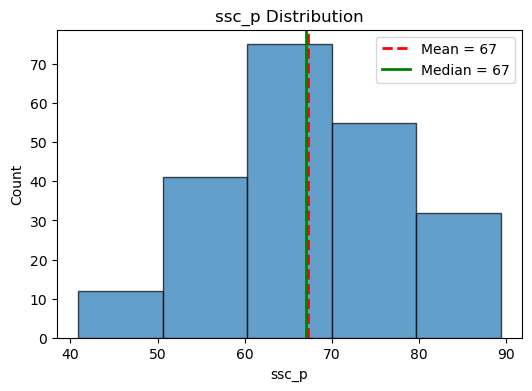

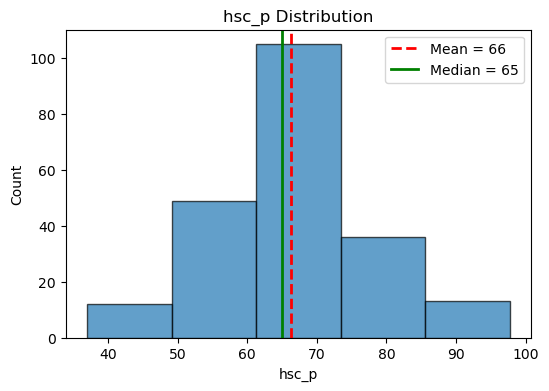

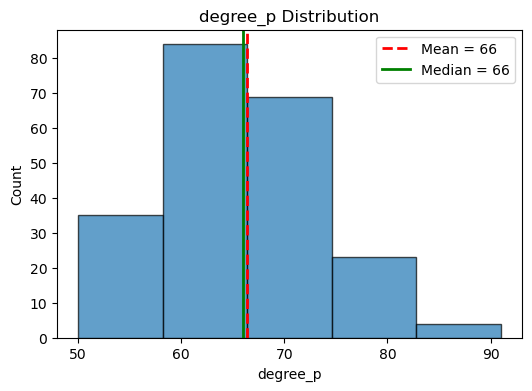

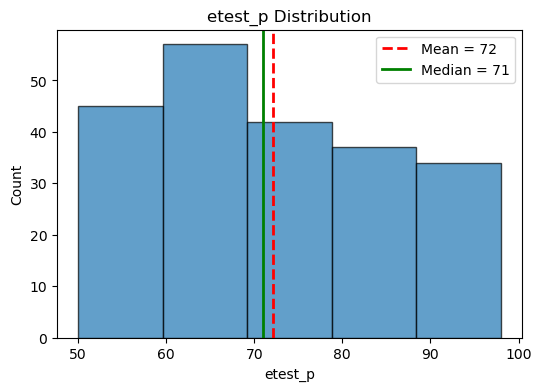

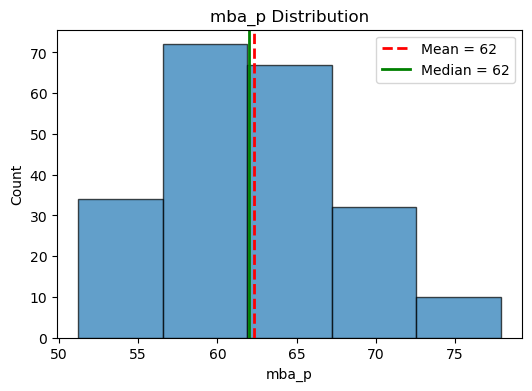

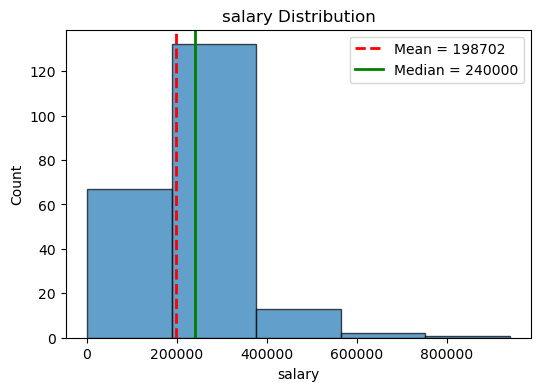

In [40]:
for column in quan:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=5, edgecolor='black', alpha=0.7)

    # Mean & Median lines
    mean = df[column].mean()
    median = df[column].median()
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean:.0f}")
    plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f"Median = {median:.0f}")

    # Labels & title
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

## BOX plot
#### The bottom of the box = 25th percentile (Q1)
#### The middle line = 50th percentile (median)
#### The top of the box = 75th percentile (Q3)
#### find the variance

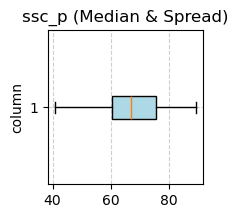

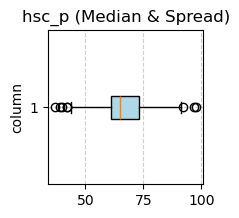

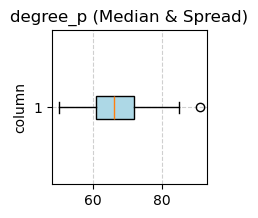

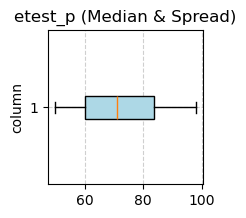

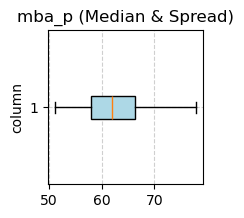

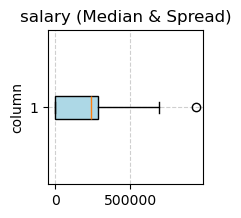

In [44]:
for column in quan:
    plt.figure(figsize=(2, 2))
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"{column} (Median & Spread)")
    plt.ylabel("column")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [43]:
df["ssc_p"].describe()


count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

In [ ]:
Barchart chart (freequncy)

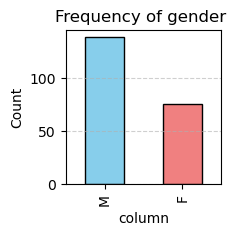

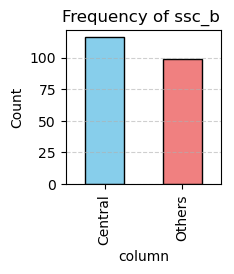

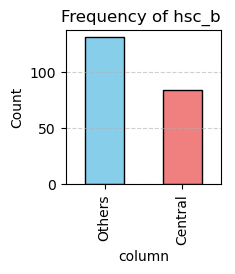

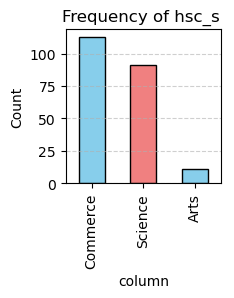

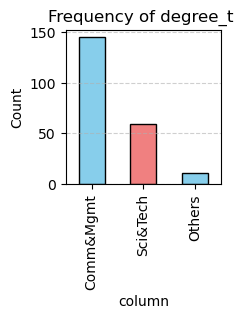

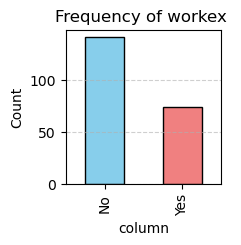

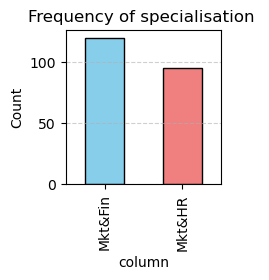

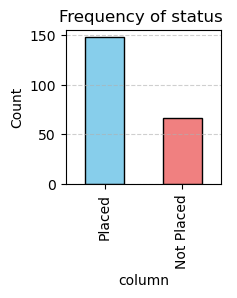

In [45]:
for column in qual:
    plt.figure(figsize=(2, 2))
    df[column].value_counts().plot(kind="bar", color=["skyblue", "lightcoral"], edgecolor="black")
    plt.title(f"Frequency of {column} ")
    plt.xlabel("column")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

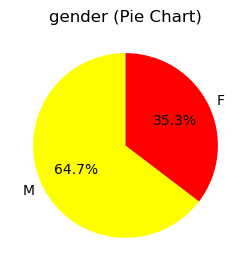

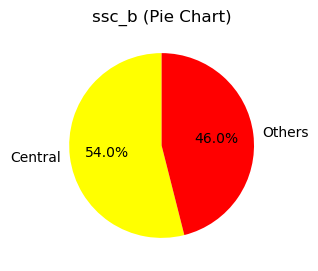

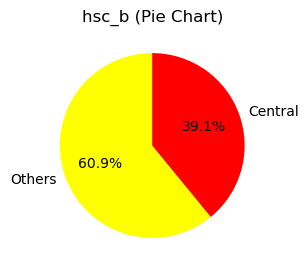

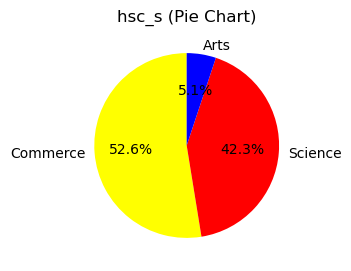

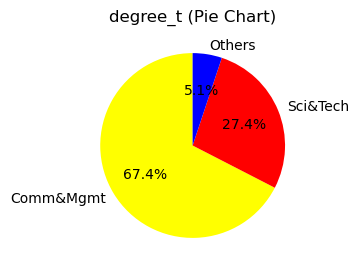

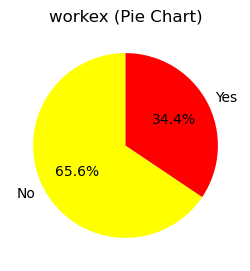

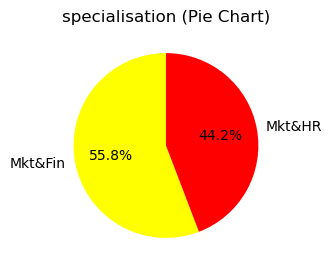

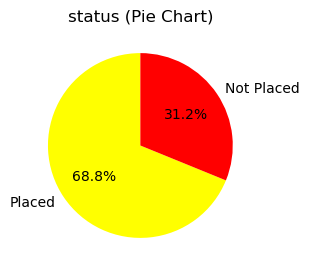

In [46]:
for column in qual:
    plt.figure(figsize=(3, 3))
    df[column].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["yellow", "red",'Blue'])
    plt.title(f"{column} (Pie Chart)")
    plt.ylabel("")  # remove default y-label
    plt.show()

In [ ]:
# Barchart shows the ram value 
# pie chart shows percentage value

## variance & standard deviation 
##### சராசரி எங்கே இருக்கு — உங்க team average performance என்னன்னு தெரியும்.
##### எத்தனை பேர் குறைவா perform பண்ணுறாங்க — training வேணுமா என்று முடிவு பண்ணலாம்.
##### எத்தனை பேர் அதிகம் perform பண்ணுறாங்க — bonus அல்லது reward கொடுக்கலாம்.

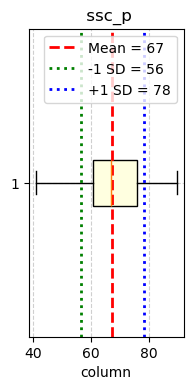

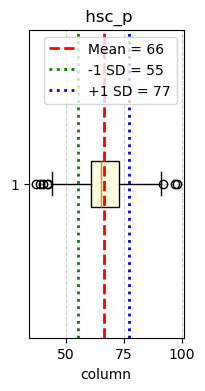

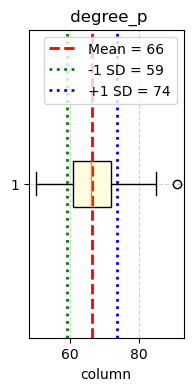

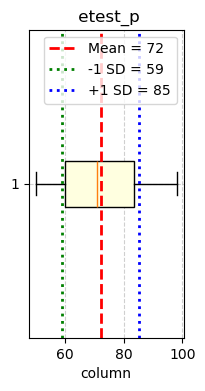

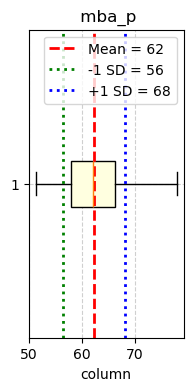

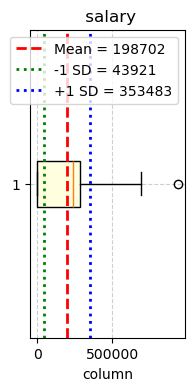

In [47]:
for column in quan:
    # Calculate key values
    mean_column = df[column].mean()
    std_column = df[column].std()
    var_column = df[column].var()
    
    # Box Plot showing variance & std dev concept
    plt.figure(figsize=(2, 4))
    plt.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightyellow"))
    plt.axvline(mean_column, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_column:.0f}")
    plt.axvline(mean_column - std_column, color='green', linestyle=':', linewidth=2, label=f"-1 SD = {mean_column - std_column:.0f}")
    plt.axvline(mean_column + std_column, color='blue', linestyle=':', linewidth=2, label=f"+1 SD = {mean_column + std_column:.0f}")
    plt.title(f" {column}")
    plt.xlabel("column")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    # Print values for explanation
    mean_column, std_column, var_column


## Covarince
##### Positive covariance = same direction move
##### Negative covariance = opposite direction move

C:\Users\anand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


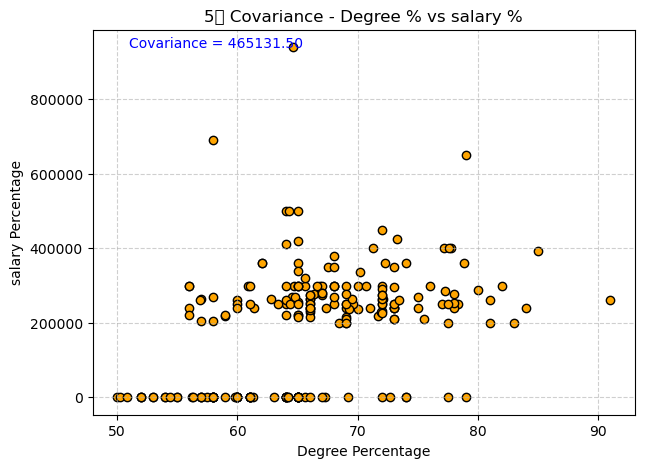

np.float64(465131.50423820905)

In [48]:
# Calculate covariance between degree and MBA marks
cov_value = df[["degree_p", "salary"]].cov().iloc[0, 1]

# Scatter plot for covariance visualization
plt.figure(figsize=(7, 5))
plt.scatter(df["degree_p"], df["salary"], color="orange", edgecolor="black")
plt.title("5️⃣ Covariance - Degree % vs salary %")
plt.xlabel("Degree Percentage")
plt.ylabel("salary Percentage")
plt.grid(True, linestyle="--", alpha=0.6)

# Display covariance value on the plot
plt.text(df["degree_p"].min()+1, df["salary"].max()-2, f"Covariance = {cov_value:.2f}", fontsize=10, color="blue")
plt.show()

cov_value


In [ ]:
### correlation using scatter plot

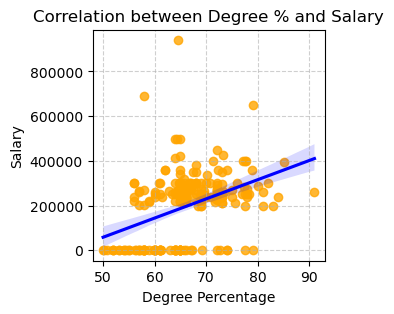

In [49]:
# Scatter plot: degree_p vs salary
plt.figure(figsize=(3, 3))
sns.regplot(x="degree_p", y="salary", data=df, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
plt.title("Correlation between Degree % and Salary")
plt.xlabel("Degree Percentage")
plt.ylabel("Salary")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

C:\Users\anand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


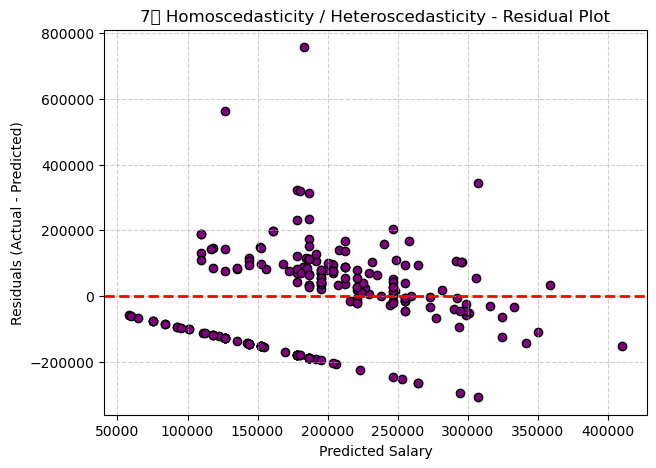

In [51]:
from sklearn.linear_model import LinearRegression

# Prepare regression model
X = df[["degree_p"]]
y = df["salary"]
model = LinearRegression()
model.fit(X, y)

# Predictions and residuals
predicted = model.predict(X)
residuals = y - predicted

# Residual plot
plt.figure(figsize=(7, 5))
plt.scatter(predicted, residuals, color="purple", edgecolor="black")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.title("7️⃣ Homoscedasticity / Heteroscedasticity - Residual Plot")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
